In [1]:
# importing libs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Getting file
import os
cwd=os.getcwd()
print('current working directory',cwd) 

current working directory C:\Users\ASUS


In [3]:
pwd=os.chdir('D:\Kaggle_ML_Projects\Paris House Price Prediction')
print('present working directory',pwd)

present working directory None


In [5]:
# Reading file
df=pd.read_csv('ParisHousing.csv')
df.head(5)

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0


In [6]:
# Getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   squareMeters       10000 non-null  int64  
 1   numberOfRooms      10000 non-null  int64  
 2   hasYard            10000 non-null  int64  
 3   hasPool            10000 non-null  int64  
 4   floors             10000 non-null  int64  
 5   cityCode           10000 non-null  int64  
 6   cityPartRange      10000 non-null  int64  
 7   numPrevOwners      10000 non-null  int64  
 8   made               10000 non-null  int64  
 9   isNewBuilt         10000 non-null  int64  
 10  hasStormProtector  10000 non-null  int64  
 11  basement           10000 non-null  int64  
 12  attic              10000 non-null  int64  
 13  garage             10000 non-null  int64  
 14  hasStorageRoom     10000 non-null  int64  
 15  hasGuestRoom       10000 non-null  int64  
 16  price              1000

In [7]:
df.shape

(10000, 17)

In [8]:
# dropping column
df.drop(columns='cityCode',axis=1,inplace=True)

<AxesSubplot:>

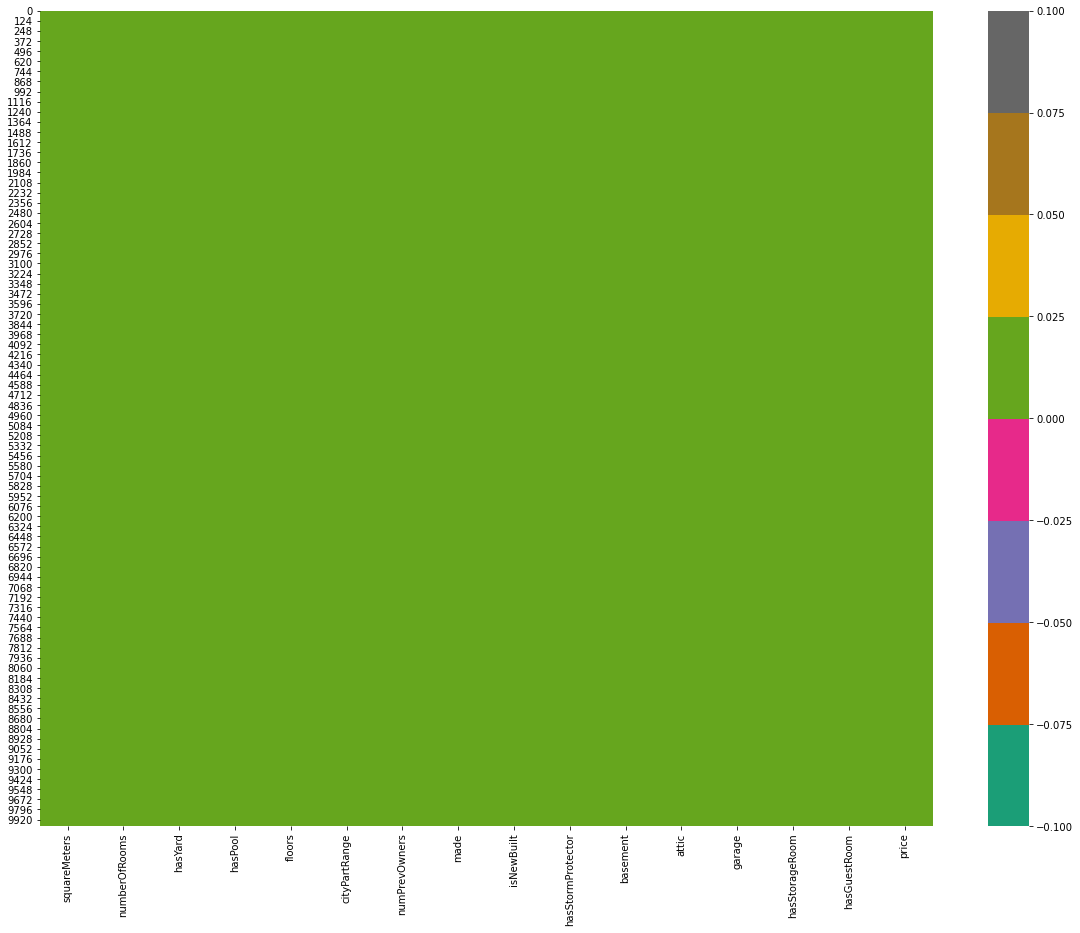

In [8]:
# Checing null values
plt.figure(figsize=(20,15))
sns.heatmap(df.isnull(),cmap='Dark2')

In [10]:
df.shape

(10000, 16)

In [11]:
#statstical view
df.describe().T.style.bar(subset=['mean'],color='#205ff2').background_gradient(subset=['std'],cmap='Reds')\
.background_gradient(subset=['50%'],cmap='coolwarm')


,count,mean,std,min,25%,50%,75%,max
squareMeters,10000.000000,49870.131200,28774.375350,89.000000,25098.500000,50105.500000,74609.750000,99999.000000
numberOfRooms,10000.000000,50.358400,28.816696,1.000000,25.000000,50.000000,75.000000,100.000000
hasYard,10000.000000,0.508700,0.499949,0.000000,0.000000,1.000000,1.000000,1.000000
hasPool,10000.000000,0.496800,0.500015,0.000000,0.000000,0.000000,1.000000,1.000000
floors,10000.000000,50.276300,28.889171,1.000000,25.000000,50.000000,76.000000,100.000000
cityPartRange,10000.000000,5.510100,2.872024,1.000000,3.000000,5.000000,8.000000,10.000000
numPrevOwners,10000.000000,5.521700,2.856667,1.000000,3.000000,5.000000,8.000000,10.000000
made,10000.000000,2005.488500,9.308090,1990.000000,1997.000000,2005.500000,2014.000000,2021.000000
isNewBuilt,10000.000000,0.499100,0.500024,0.000000,0.000000,0.000000,1.000000,1.000000
hasStormProtector,10000.000000,0.499900,0.500025,0.000000,0.000000,0.000000,1.000000,1.000000


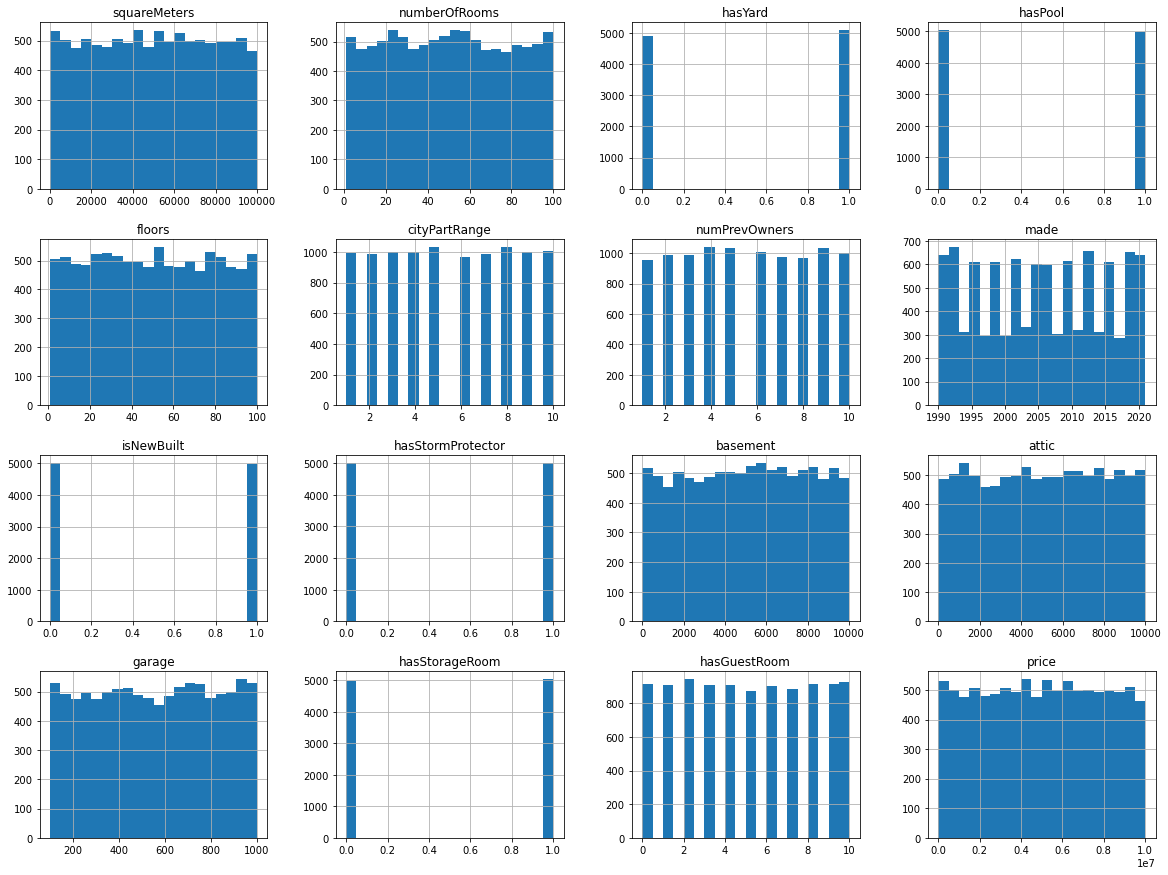

In [12]:
#Visualising Histograms
df.hist(bins=20,figsize=(20,15))
plt.show()

In [13]:
# Looking for Correlations
corr_matrix=df.corr()
corr_matrix['price'].sort_values(ascending=False)

price                1.000000
squareMeters         0.999999
numPrevOwners        0.016619
numberOfRooms        0.009591
cityPartRange        0.008813
hasStormProtector    0.007496
floors               0.001654
attic               -0.000600
hasGuestRoom        -0.000644
hasStorageRoom      -0.003485
basement            -0.003967
hasPool             -0.005070
hasYard             -0.006119
made                -0.007210
isNewBuilt          -0.010643
garage              -0.017229
Name: price, dtype: float64

In [ ]:
# looks like price of house has very strong positive correlation with attribute squaremeters

array([[<AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='squareMeters', ylabel='price'>,
        <AxesSubplot:xlabel='numPrevOwners', ylabel='price'>,
        <AxesSubplot:xlabel='numberOfRooms', ylabel='price'>],
       [<AxesSubplot:xlabel='price', ylabel='squareMeters'>,
        <AxesSubplot:xlabel='squareMeters', ylabel='squareMeters'>,
        <AxesSubplot:xlabel='numPrevOwners', ylabel='squareMeters'>,
        <AxesSubplot:xlabel='numberOfRooms', ylabel='squareMeters'>],
       [<AxesSubplot:xlabel='price', ylabel='numPrevOwners'>,
        <AxesSubplot:xlabel='squareMeters', ylabel='numPrevOwners'>,
        <AxesSubplot:xlabel='numPrevOwners', ylabel='numPrevOwners'>,
        <AxesSubplot:xlabel='numberOfRooms', ylabel='numPrevOwners'>],
       [<AxesSubplot:xlabel='price', ylabel='numberOfRooms'>,
        <AxesSubplot:xlabel='squareMeters', ylabel='numberOfRooms'>,
        <AxesSubplot:xlabel='numPrevOwners', ylabel='numberOfRooms'>,
        <AxesSubplo

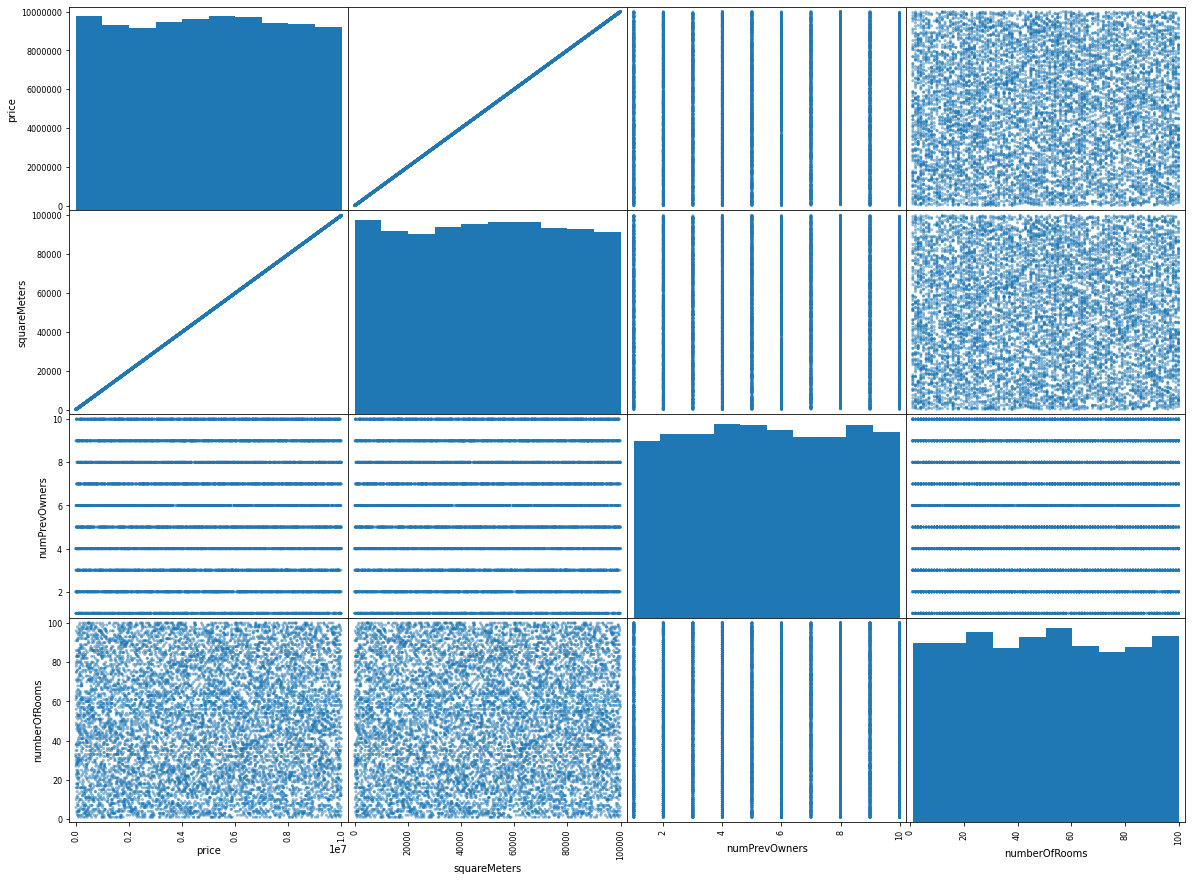

In [14]:
from pandas.plotting import scatter_matrix
attributes=['price','squareMeters','numPrevOwners','numberOfRooms']
scatter_matrix(df[attributes],figsize=(20,15))

<AxesSubplot:xlabel='squareMeters', ylabel='price'>

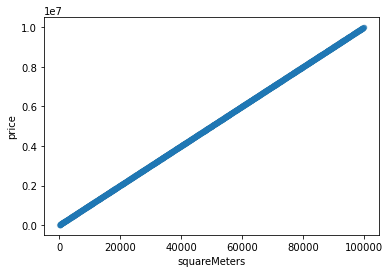

In [15]:
# Relation b/w price and squaremeters
df.plot(kind='scatter',x='squareMeters',y='price',alpha=0.1)

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


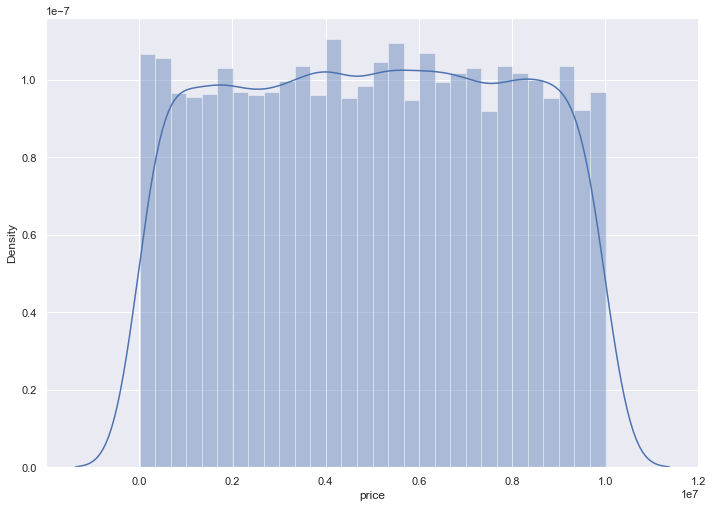

In [16]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(df['price'],bins=30)
plt.show()

<AxesSubplot:>

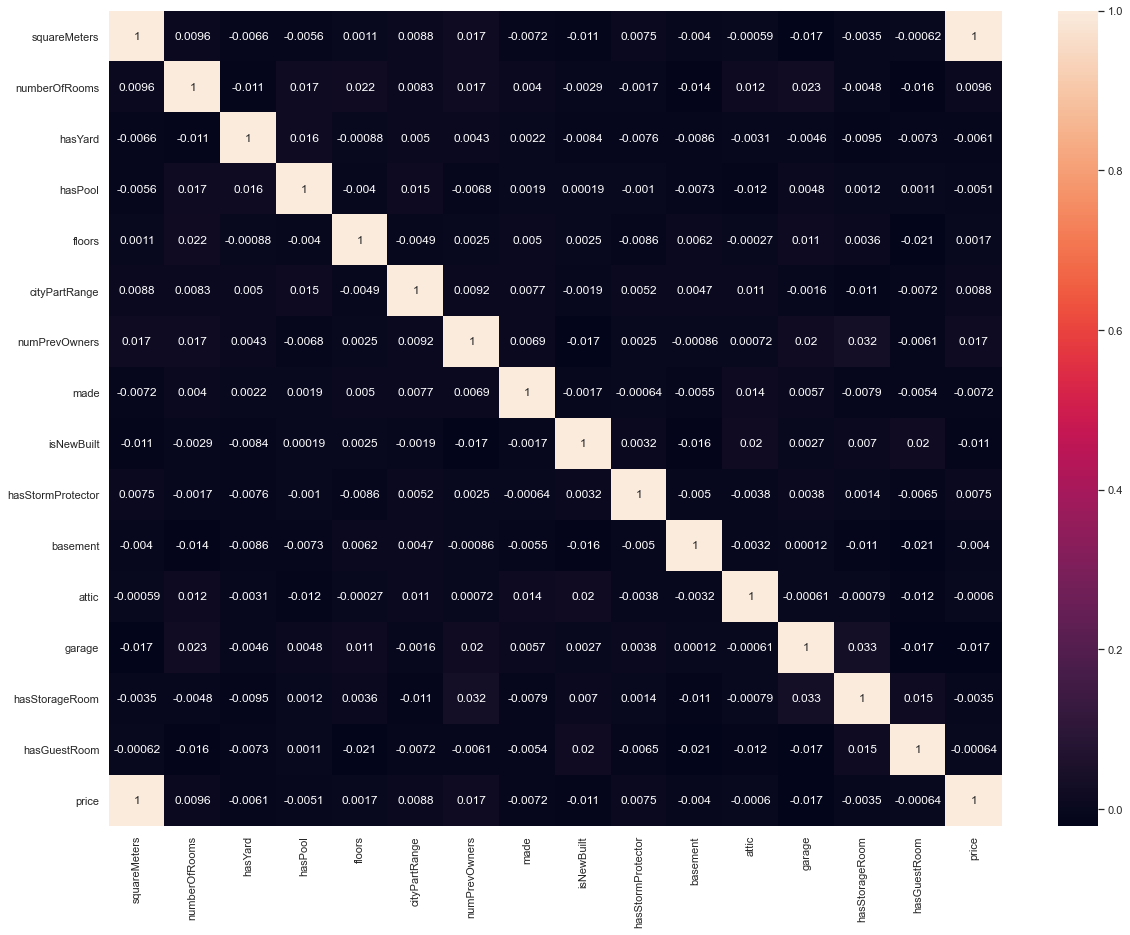

In [17]:
#visualizing corr
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)

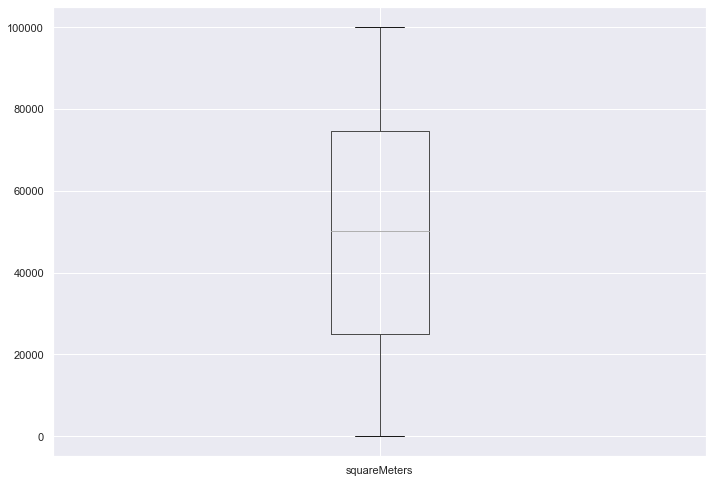

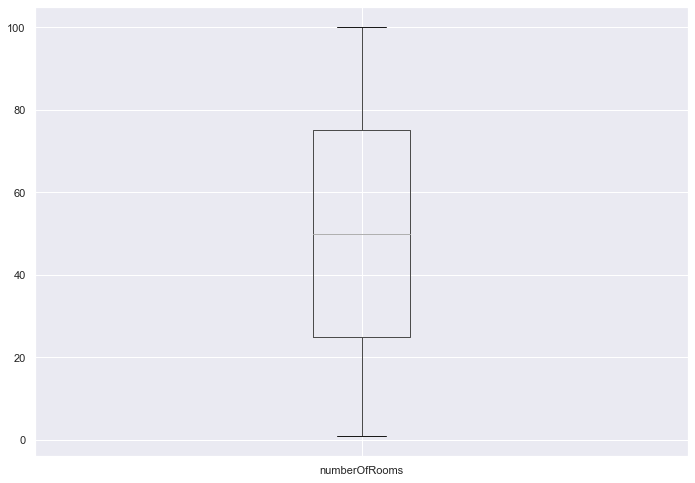

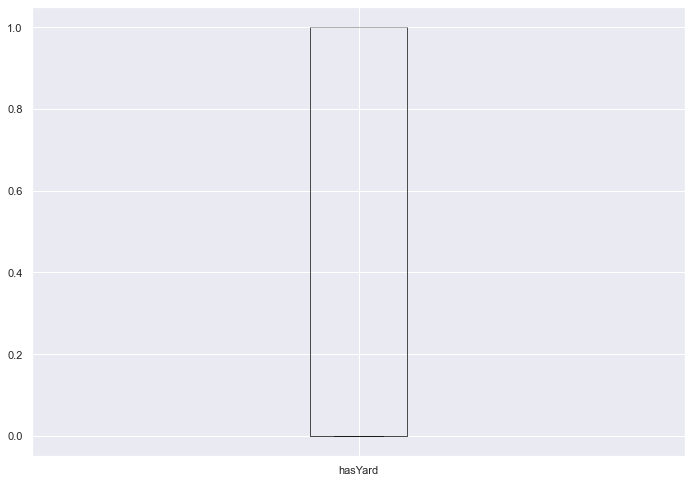

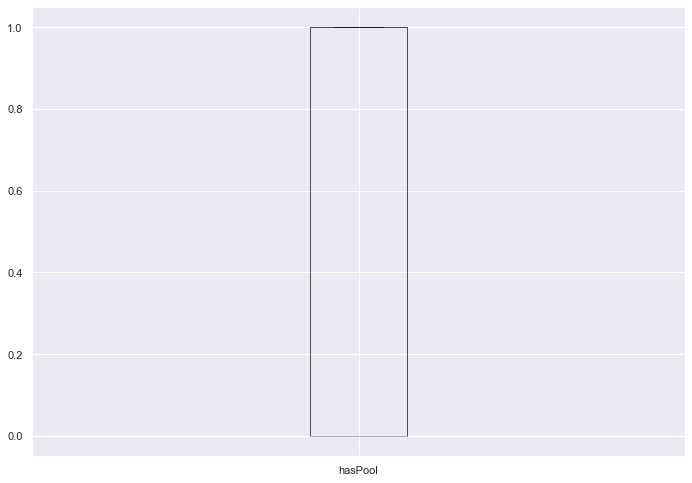

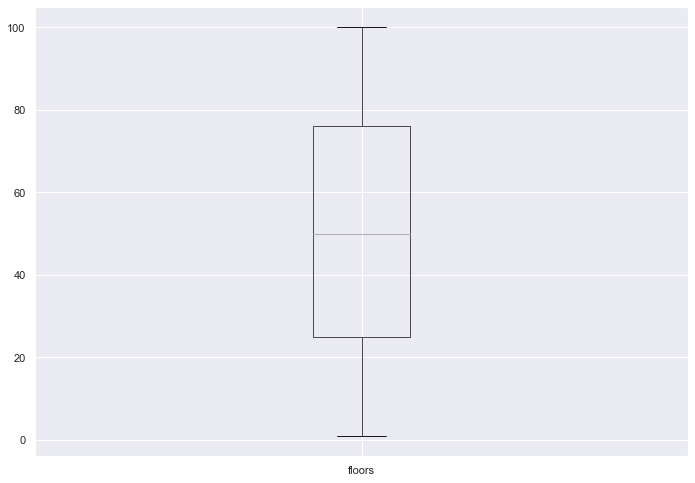

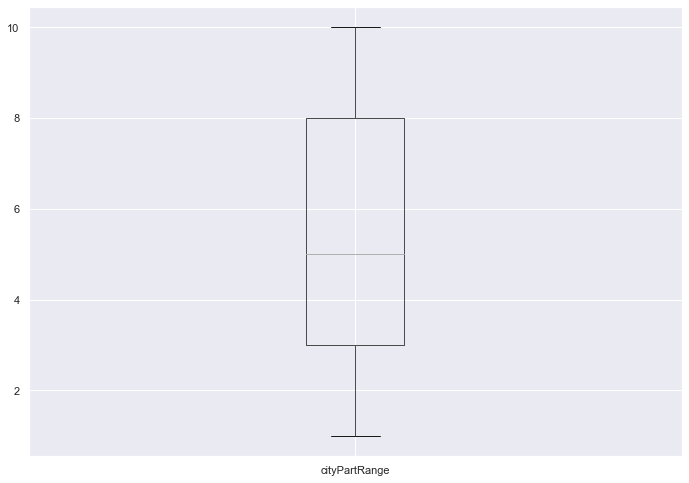

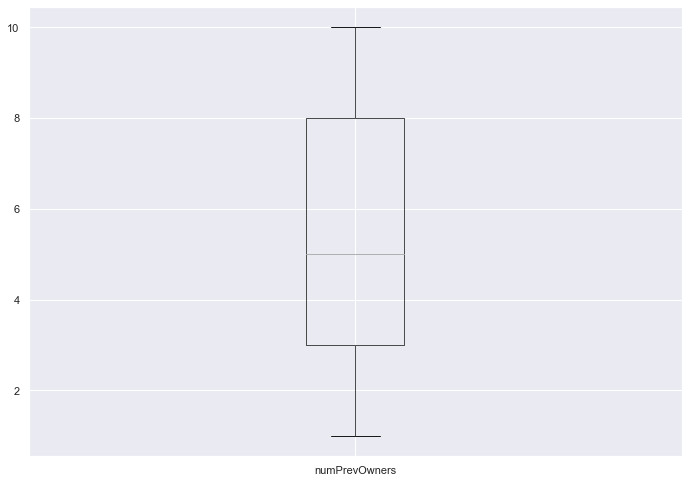

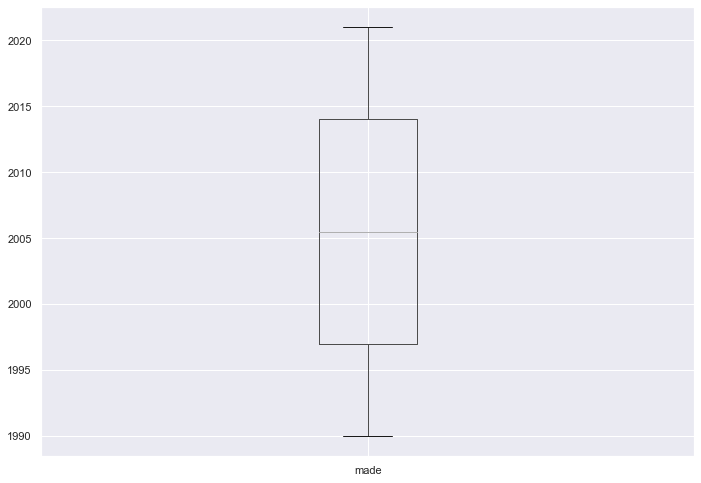

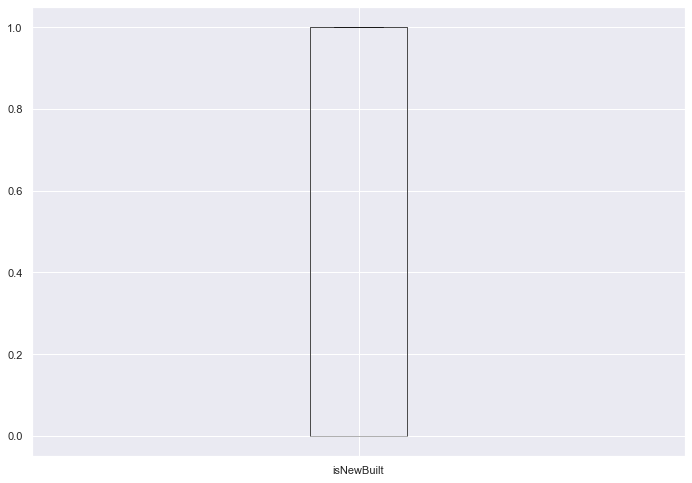

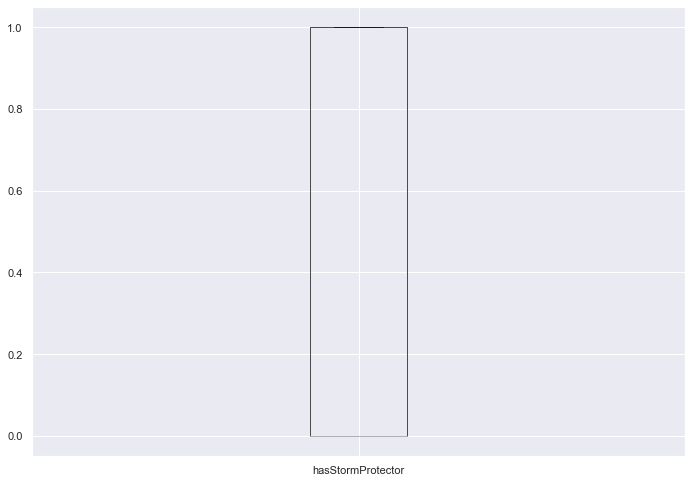

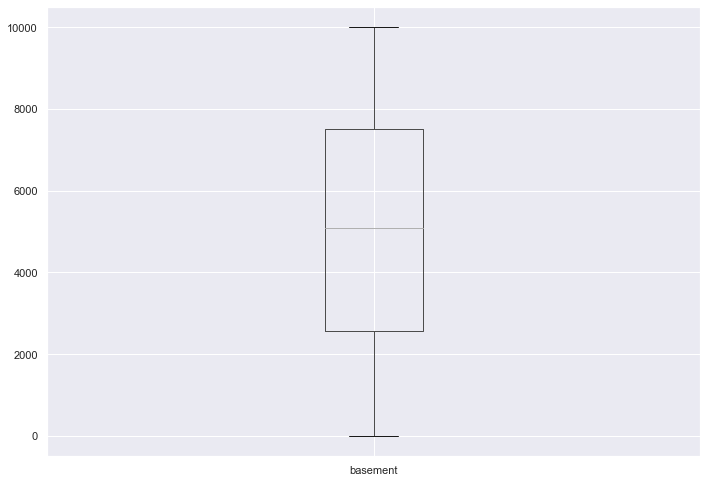

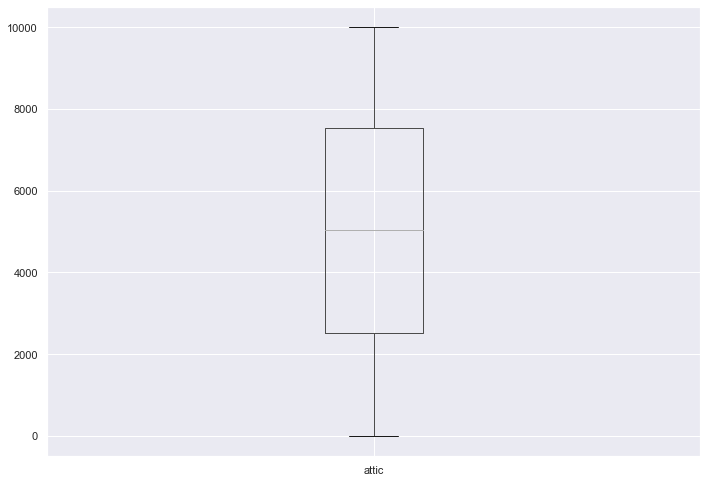

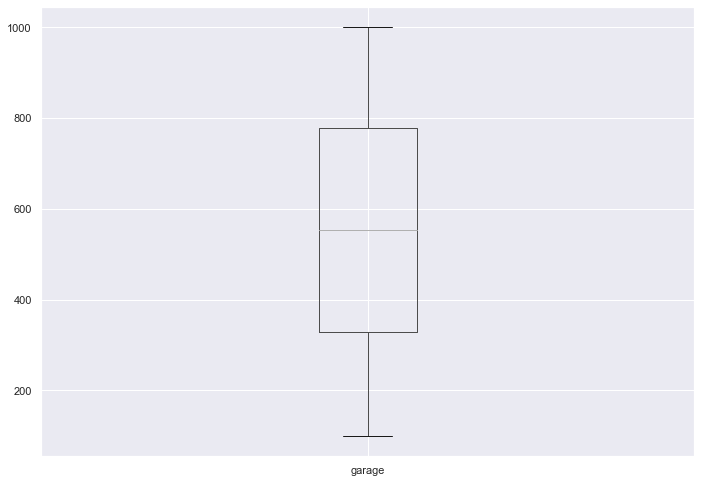

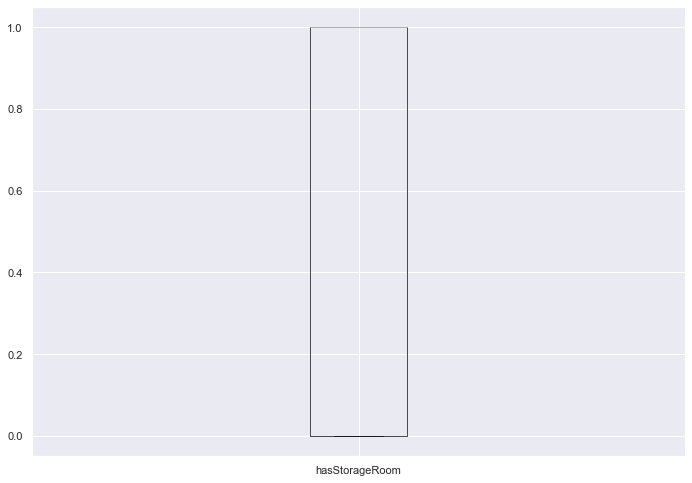

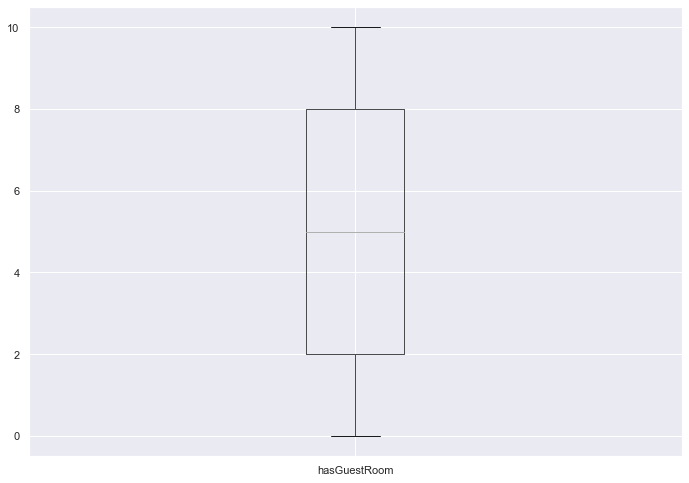

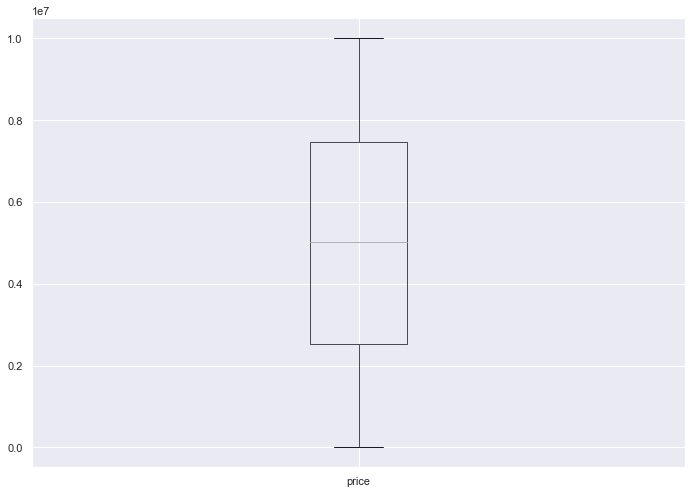

In [18]:
# Let's check for outliers
for column in df:
    plt.figure()
    df.boxplot([column])

In [19]:
df['made']=pd.get_dummies(df['made'])
df['made']

0       0
1       0
2       0
3       0
4       1
       ..
9995    0
9996    1
9997    0
9998    0
9999    0
Name: made, Length: 10000, dtype: uint8

In [20]:
# splitting dependent and independent variables
X=df.drop(columns='price',axis=1)
y=df['price']


In [21]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [22]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.fit_transform(X_test)

In [23]:
# let's train our model
# To get best result from our model I am using best hyperparameter values which i got using Grid Search CV below:
from sklearn.ensemble import RandomForestRegressor
forest_reg=RandomForestRegressor(n_estimators=100,max_depth= None, max_features= 'auto',
                                 min_samples_leaf=3,min_samples_split= 2)
                                 

In [24]:
forest_reg.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=3)

In [25]:
prediction=forest_reg.predict(X_test)

### Error


In [26]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,prediction)
rmse=np.sqrt(mse)
rmse

3878.26555363707

### Comparision


In [27]:
original_values=y_test[:5]
predicted_values=prediction[:5]
comparision_df=pd.DataFrame(data={'Original_Values':original_values,
                                 'Predicted_Values':predicted_values})
comparision_df['Difference']=comparision_df['Original_Values']-comparision_df['Predicted_Values']
comparision_df

,Original_Values,Predicted_Values,Difference
9394,1402812.2,1.405893e+06,-3080.887787
898,506461.3,5.077266e+05,-1265.303523
2398,6272659.4,6.278139e+06,-5479.134061
5906,8769157.6,8.766009e+06,3148.582043
2343,190783.0,1.934268e+05,-2643.756085


### Cross Validation

In [29]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(forest_reg,X_train_scaled,y_train,scoring='neg_mean_squared_error',cv=10)
rmse_scores=np.sqrt(-scores)

In [30]:
def display_scores(scores):
    print('scores:',scores)
    print('Mean:',scores.mean())
    print('Standard Devaition:',scores.std())
    

In [31]:
display_scores(rmse_scores)

scores: [3766.76994836 3755.87078146 3884.09457064 3918.20657655 3908.96673925
 3846.68154936 3784.26568937 3857.4088949  3814.06231461 4014.47025508]
Mean: 3855.079731957748
Standard Devaition: 75.861751330801


## Fine Tune Our Model

### Grid Search CV

In [33]:
from sklearn.model_selection import GridSearchCV

#no. of trees in random forest
n_estimators=[int (x) for x in np.linspace(start=10, stop=100, num=10)]
# no. of features to consider at every split
max_features= ['auto','sqrt','log2']
# maximium no. of levels in tree
max_depth=[2,4,8,10,12,None]
# minimum no. of samples required to split a node
min_samples_split=[2,5]
# minimum no. samples required at each leaf node
min_samples_leaf=[1,3,5,10,25,100]
# method of selecting samples for each tree 
bootstrap=[True,False]


In [49]:
# This step can take lot of time so try lowering the no. of hyperparamter values
param_grid = { 
    'n_estimators':n_estimators ,
    'max_features': max_features,
    'max_depth' : max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    }
forest_reg=RandomForestRegressor(n_jobs=-1)
grid_search=GridSearchCV(forest_reg,param_grid,cv=5,scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1),
             param_grid={'max_depth': [2, 4, 8, 10, 12, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 5, 10, 25, 100],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90,
                                          100]},
             scoring='neg_mean_squared_error')

In [53]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 100}

In [54]:
grid_search.best_estimator_

RandomForestRegressor(min_samples_leaf=3, n_jobs=-1)

In [55]:
cvres=grid_search.cv_results_
for mean_score,params in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-mean_score),params)

701736.8441598489 {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 10}
697746.0169684449 {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}
699261.654057114 {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 30}
700500.169556563 {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40}
699876.3806790056 {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
699057.3582090791 {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 60}
700033.3487392298 {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 70}
701074.622924985 {'max_depth': 2, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators':

722473.5397586654 {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 20}
714851.7870774254 {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 30}
684746.6271166779 {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 40}
710621.0020529466 {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
662589.7240357745 {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 60}
682736.3084010686 {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 70}
702421.624378057 {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 80}
677092.5353784786 {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_es

In [56]:
from sklearn.metrics import r2_score # Perfect r2 score
r2_score(y_test,prediction)

0.9999981318976302